In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib import colors as mcolors
from IPython.display import HTML, Image
import gpflow
# sns.set_style('whitegrid')

import gpflow as gpf

2023-09-29 16:58:09.612243: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 16:58:09.873461: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-29 16:58:09.934486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-29 16:58:09.934510: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

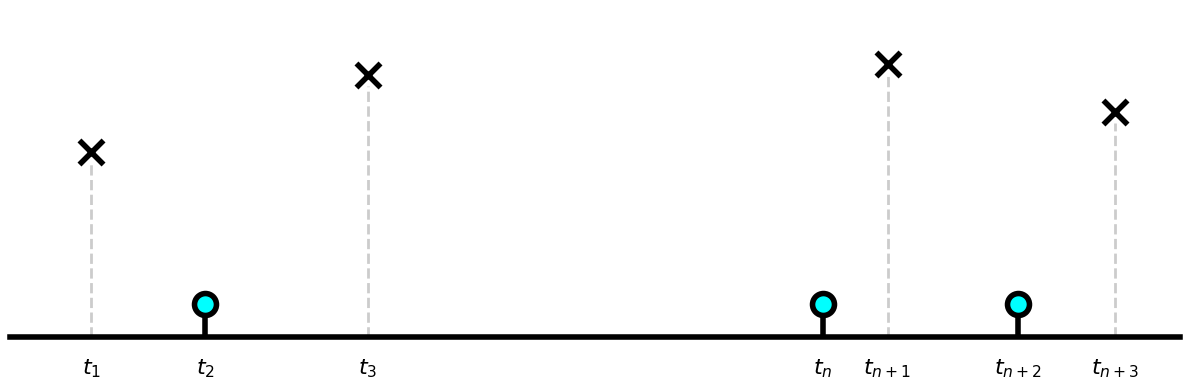

In [2]:
N_range = 100
T = 10
domain = [0, T]
xx = np.linspace(domain[0], domain[1], N_range)

t = [0.5, 2.4, 3.0]
X = [0.15, 1., 2.6, 3.3]
y = np.array([0.85, 1.2, 1.25, 1.03])
N = len(t)

# Linewidth
LW = 4
FS = 16

plt.figure(figsize=(12, 4))
ax = plt.gca()

# Remove axes
# ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['bottom'].set_linewidth(LW)
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)

# Plot PP
pp_height = 0.15
plt.vlines(t, 0.0, pp_height - 0.05, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [pp_height] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=250, 
            label=r'Actions $\mathbf{a}$')
plt.vlines(X, 0.0, y - 0.05, color='black', linestyles="--", linewidth=LW-2, alpha=0.2)
plt.scatter(X, y, marker='x', color='black', linewidth=LW, s=300, label=r'Outcomes $\mathbf{y}$')

# observation_texts = [r'$y_1$', r'$y_3$', r'$y_4$', r'$y_6$']
# for xi, yi, txt in zip(X, y, observation_texts):
#     ax.annotate(txt, (xi-0.06, yi+0.07), fontsize=FS)
# action_texts = [r'$a_1$', r'$a_2$',]
# for xi, txt in zip(t, action_texts):
#     ax.annotate(txt, (xi-0.075, 0.11+0.05), fontsize=FS)

# plt.annotate(text=r"$\ldots$", xy=(1.6, 0.6), fontsize=50)

# Labels and ticks
plt.ylim(-0.0, 1.5)
t_events = np.sort(np.concatenate([X, t]))
_ = plt.xticks(t_events, [r'$t_1$', r'$t_2$', r'$t_3$', r'$t_{n}$', r'$t_{n+1}$', r'$t_{n+2}$', r'$t_{n+3}$'], fontsize=FS)
# plt.xticks([])
plt.xlim(-0.1, 3.5)
# plt.legend(fontsize=18, loc='upper left')
plt.tight_layout()
plt.savefig("figures/paper/figure2_plain_v2.pdf")

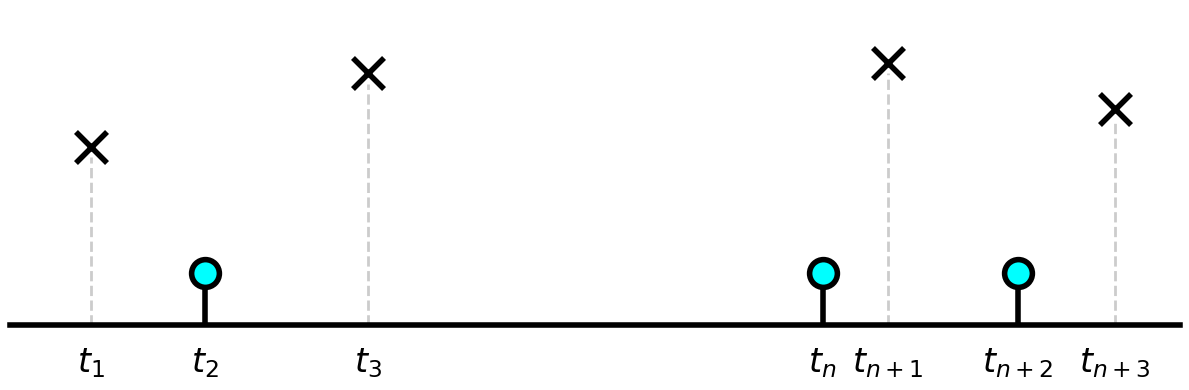

In [3]:
N_range = 100
T = 10
domain = [0, T]
xx = np.linspace(domain[0], domain[1], N_range)

t = [0.5, 2.4, 3.0]
X = [0.15, 1., 2.6, 3.3]
y = np.array([0.85, 1.2, 1.25, 1.03])
N = len(t)

# Linewidth
LW = 4
FS = 24

plt.figure(figsize=(12, 4.0))
ax = plt.gca()

# Remove axes
# ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['bottom'].set_linewidth(LW)
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)

# Plot PP
pp_height = 0.25
plt.vlines(t, 0.0, pp_height - 0.06, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [pp_height] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=400, 
            label=r'Actions $\mathbf{a}$')
plt.vlines(X, 0.0, y - 0.05, color='black', linestyles="--", linewidth=LW-2, alpha=0.2)
plt.scatter(X, y, marker='x', color='black', linewidth=LW, s=500, label=r'Outcomes $\mathbf{y}$')

# observation_texts = [r'$y_1$', r'$y_3$', r'$y_4$', r'$y_6$']
# for xi, yi, txt in zip(X, y, observation_texts):
#     ax.annotate(txt, (xi-0.06, yi+0.07), fontsize=FS)
# action_texts = [r'$a_1$', r'$a_2$',]
# for xi, txt in zip(t, action_texts):
#     ax.annotate(txt, (xi-0.075, 0.11+0.05), fontsize=FS)

# plt.annotate(text=r"$\ldots$", xy=(1.6, 0.6), fontsize=50)

# Labels and ticks
plt.ylim(-0.0, 1.5)
t_events = np.sort(np.concatenate([X, t]))
_ = plt.xticks(t_events, [r'$t_1$', r'$t_2$', r'$t_3$', r'$t_{n}$', r'$t_{n+1}$', r'$t_{n+2}$', r'$t_{n+3}$'], fontsize=FS)
# plt.xticks([])
plt.xlim(-0.1, 3.5)
# plt.legend(fontsize=18, loc='upper left')
plt.tight_layout()
plt.savefig("figures/paper/figure2_plain_one_column.pdf")

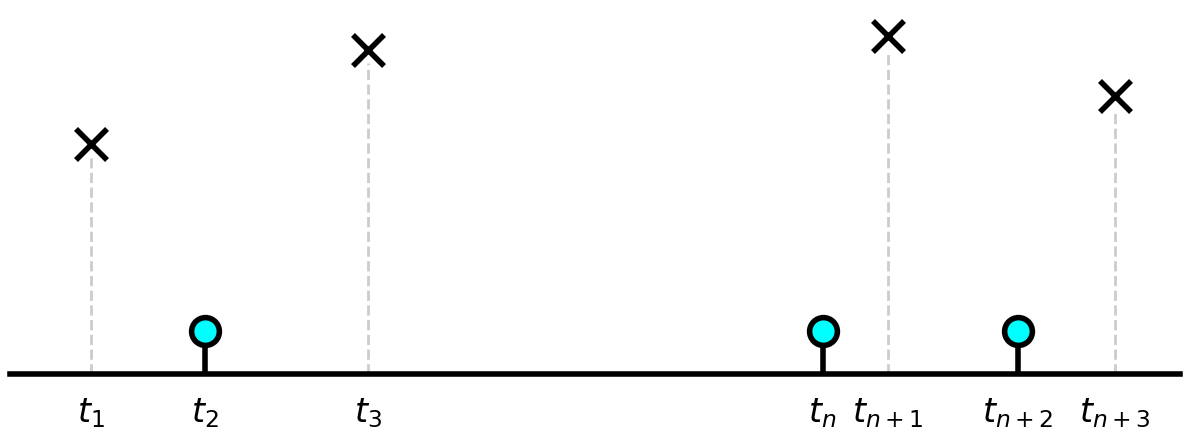

In [4]:
N_range = 100
T = 10
domain = [0, T]
xx = np.linspace(domain[0], domain[1], N_range)

t = [0.5, 2.4, 3.0]
X = [0.15, 1., 2.6, 3.3]
y = np.array([0.85, 1.2, 1.25, 1.03])
N = len(t)

# Linewidth
LW = 4
FS = 24

plt.figure(figsize=(12, 4.5))
ax = plt.gca()

# Remove axes
# ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['bottom'].set_linewidth(LW)
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)

# Plot PP
pp_height = 0.16
plt.vlines(t, 0.0, pp_height - 0.06, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [pp_height] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=400, 
            label=r'Actions $\mathbf{a}$')
plt.vlines(X, 0.0, y - 0.05, color='black', linestyles="--", linewidth=LW-2, alpha=0.2)
plt.scatter(X, y, marker='x', color='black', linewidth=LW, s=500, label=r'Outcomes $\mathbf{y}$')

# observation_texts = [r'$y_1$', r'$y_3$', r'$y_4$', r'$y_6$']
# for xi, yi, txt in zip(X, y, observation_texts):
#     ax.annotate(txt, (xi-0.06, yi+0.07), fontsize=FS)
# action_texts = [r'$a_1$', r'$a_2$',]
# for xi, txt in zip(t, action_texts):
#     ax.annotate(txt, (xi-0.075, 0.11+0.05), fontsize=FS)

# plt.annotate(text=r"$\ldots$", xy=(1.6, 0.6), fontsize=50)

# Labels and ticks
plt.ylim(-0.0, 1.35)
t_events = np.sort(np.concatenate([X, t]))
_ = plt.xticks(t_events, [r'$t_1$', r'$t_2$', r'$t_3$', r'$t_{n}$', r'$t_{n+1}$', r'$t_{n+2}$', r'$t_{n+3}$'], fontsize=FS)
# plt.xticks([])
plt.xlim(-0.1, 3.5)
# plt.legend(fontsize=18, loc='upper left')
plt.tight_layout()
plt.savefig("figures/paper/figure2_plain_one_column_v2.pdf")

In [5]:
obs_marker_size = 100
action_marker_size = 200


normal_effect = lambda ti, x, a, mu, sigma: a * np.exp(-(np.power((x-mu-ti)/sigma, 2)))
gamma_effect = lambda x: ((1/1.16) * 0.1 *
                          (x ** (2.5 - 1)) * np.exp(-1.0 * x))
normal_bump = lambda x, a, mu, sigma: a * np.exp(-(np.power((x-mu)/sigma, 2)))


def f_joint(x, t):
    baseline = f(x)
    sigma = 0.4
    a = 0.4
    mu = 0.8
    for ti in t:
        baseline += normal_effect(ti, x, a, mu, sigma)
    return baseline

lamb_fnc = lambda x: normal_bump(x, a=1.0, mu=1.0, sigma=0.4) + 0.8 * normal_bump(x, a=1.0, mu=4.0, sigma=0.4)
lamb_cf_fnc = lambda x: 0.8 * normal_bump(x, a=1.0, mu=2.5, sigma=1.0)

In [7]:
fb_fnc = lambda x: np.exp(-0.05 * x) + 0.3 * np.cos(np.pi/2 + 2 * np.pi / 10 * x)
def ft_func1(x,mu):
    return 0.9 * np.exp(-(np.power((x-0.9-mu)/0.5, 2))) - 0.3 * np.exp(-(np.power((x-1.8-mu)/0.3, 2)))

def ft_func2(x,mu):
    return 0.9 * np.exp(-(np.power((x-0.9-mu)/0.4, 2))) + 0.5 * np.exp(-(np.power((x-1.8-mu)/0.3, 2)))

def ft_func3(x,mu):
    return 0.9 * np.exp(-(np.power((x-0.9-mu)/0.5, 2))) # + 0.2 * np.exp(-(np.power((x-1.8-mu)/0.3, 2)))

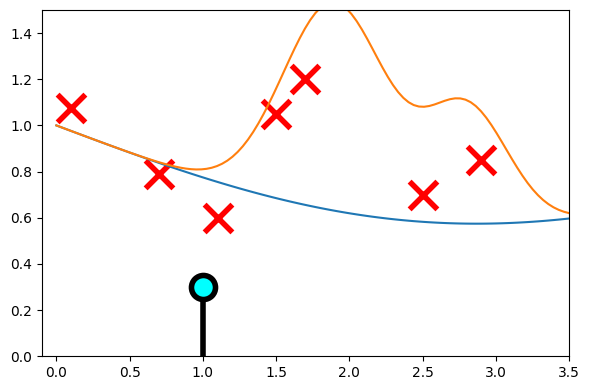

In [8]:
N_range = 100
T = 10
domain = [0, T]
xx = np.linspace(domain[0], domain[1], N_range)

t = [1.0,]
X = [0.1, 0.7, 1.1, 1.5, 1.7, 2.5, 2.9]
y = np.array([fb_fnc(0.1)+0.1, fb_fnc(0.7)-0.05, 0.6, 1.05, 1.2, 0.7, 0.85])
N = len(t)

# Linewidth
LW = 4
FS = 24

plt.figure(figsize=(6, 4))
ax = plt.gca()
xx = np.linspace(0.0, 3.5, 100)
plt.plot(xx, fb_fnc(xx))

plt.plot(xx, fb_fnc(xx) + 0.9 * np.exp(-(np.power((xx-0.9-1)/0.5, 2))) + 0.5 * np.exp(-(np.power((xx-1.8-1)/0.4, 2))))
# Remove axes
# ax.axis('off')
# ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)

# Plot PP
pp_height = 0.3
plt.vlines(t, 0.0, pp_height - 0.05, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [pp_height] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=300, 
            label=r'Actions $\mathbf{a}$')
# plt.vlines(X, 0.0, y - 0.05, color='red', linestyles="--", linewidth=LW-2, alpha=0.2)
plt.scatter(X, y, marker='x', color='red', linewidth=LW, s=400, label=r'Outcomes $\mathbf{y}$')

# observation_texts = [r'$y_1$', r'$y_3$', r'$y_4$', r'$y_6$']
# for xi, yi, txt in zip(X, y, observation_texts):
#     ax.annotate(txt, (xi-0.06, yi+0.07), fontsize=FS)
# action_texts = [r'$a_1$', r'$a_2$',]
# for xi, txt in zip(t, action_texts):
#     ax.annotate(txt, (xi-0.075, 0.11+0.05), fontsize=FS)

# Labels and ticks
plt.ylim(-0.0, 1.5)
t_events = np.sort(np.concatenate([X, t[:2]]))
# _ = plt.xticks(t_events, [r'$t_1$', r'$t_2$', r'$t_3$', r'$t_{n}$', r'$t_{n+1}$', r'$t_{n+2}$'], fontsize=FS)
# plt.xticks([])
plt.xlim(-0.1, 3.5)
# plt.legend(fontsize=18, loc='upper left')
plt.tight_layout()
plt.savefig("figures/paper/figure3.pdf")

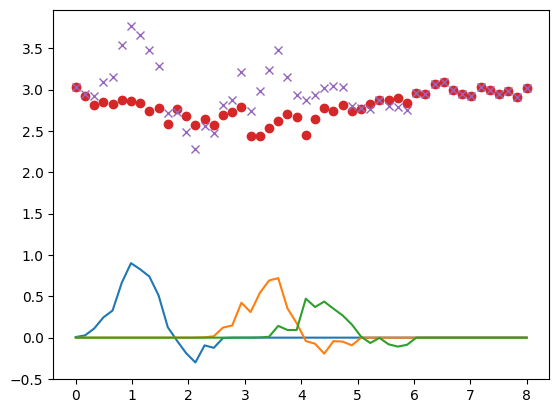

In [9]:
np.random.seed(1)
Tt = 2.4
xx = np.linspace(0.0, 8.0, 50)
noise = np.random.standard_normal(xx.shape[0]) * 0.1

fb = fb_fnc(xx) + 2.0 + np.random.standard_normal(xx.shape[0]) * 0.1
treatment_times = [0.2, 2.5, 3.5]
masks = [np.logical_and(xx>ti, xx<ti+Tt) for ti in treatment_times]
ft_noises = [np.where(mask, np.random.standard_normal(xx.shape[0]) * 0.07, 0.0) for mask in masks]

ft1 = 1.0 * ft_func1(xx, mu=treatment_times[0]) + ft_noises[0]
ft2 = 0.7 * ft_func1(xx, mu=treatment_times[1]) + ft_noises[1]
ft3 = 0.5 * ft_func1(xx, mu=treatment_times[2]) + ft_noises[2]
ft = ft1 + ft2 + ft3
f = fb + ft

plt.plot(xx, ft1, '-')
plt.plot(xx, ft2, '-')
plt.plot(xx, ft3, '-')
plt.plot(xx, fb, 'o')
plt.plot(xx, f, 'x')
plt.show()
# plt.xlim(0.98, 3.4)

In [10]:
import gpflow as gpf
k_fb = gpf.kernels.SquaredExponential()
m_fb = gpf.models.GPR(data=(xx.reshape(-1, 1), fb.reshape(-1, 1)), kernel=k_fb)
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m_fb.training_loss, m_fb.trainable_variables, options=dict(maxiter=100))
mean_fb, var_fb = m_fb.predict_f(xx.reshape(-1, 1))
mean_fb = mean_fb.numpy().flatten()
var_fb = var_fb.numpy().flatten()

2023-09-29 17:03:57.263911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-29 17:03:57.264153: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-29 17:03:57.264170: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (t31300-lr032): /proc/driver/nvidia/version does not exist
2023-09-29 17:03:57.266823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
mean_fts, var_fts = [], []
Tt = 2.4
for ts, fti, mask in zip(treatment_times, [ft1,ft2,ft3], masks):
    k_ft = gpf.kernels.SquaredExponential()
    m_ft = gpf.models.GPR(data=(xx.reshape(-1, 1), fti.reshape(-1, 1)), kernel=k_ft)
    opt = gpflow.optimizers.Scipy()
    opt_logs = opt.minimize(m_ft.training_loss, m_ft.trainable_variables, options=dict(maxiter=100))
    mean_ft, var_ft = m_ft.predict_f(xx.reshape(-1, 1))
    mean_ft, var_ft = mean_ft.numpy().flatten(), var_ft.numpy().flatten()
    mean_ft = np.where(mask, mean_ft, 0.0)
    var_ft = np.where(mask, var_ft, 0.0)
    mean_fts.append(mean_ft)
    var_fts.append(var_ft)

# for ts, fti in zip([1.0, 4.0, 5.0], [ft1,ft2,ft3], [mask1,mask2,mask3]):
#     k_ft = gpf.kernels.SquaredExponential()
#     m_ft = gpf.models.GPR(data=(xx.reshape(-1, 1), fti.reshape(-1, 1)), kernel=k_ft)
#     opt = gpflow.optimizers.Scipy()
#     opt_logs = opt.minimize(m_ft.training_loss, m_ft.trainable_variables, options=dict(maxiter=100))
#     mean_ft, var_ft = m_ft.predict_f(xx.reshape(-1, 1))
#     mean_ft, var_ft = mean_ft.numpy().flatten(), var_ft.numpy().flatten()
#     mean_ft = np.where(, mean_ft, 0.0)
#     var_ft = np.where(np.logical_and(xx>ts, xx<ts+Tt), var_ft, 0.0)
#     # mean_fts.append(mean_ft)
#     var_fts.append(var_ft)

In [12]:
k_ft = gpf.kernels.SquaredExponential()
m_ft = gpf.models.GPR(data=(xx.reshape(-1, 1), ft.reshape(-1, 1)), kernel=k_ft)
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m_ft.training_loss, m_ft.trainable_variables, options=dict(maxiter=100))
mean_ft, var_ft = m_ft.predict_f(xx.reshape(-1, 1))
mean_ft = mean_ft.numpy().flatten()
var_ft = var_ft.numpy().flatten()
mean_f = mean_fb + mean_ft

In [13]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

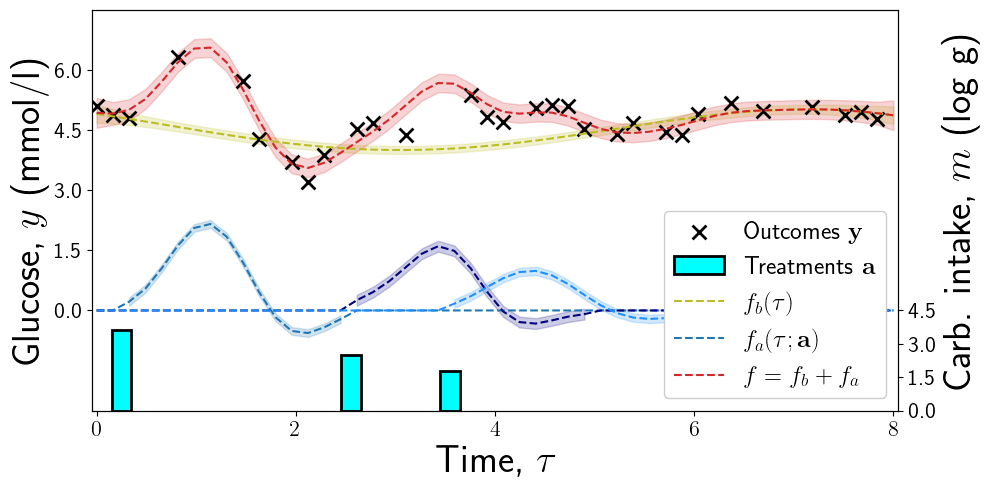

In [14]:
def plot_confidence(x, mean, var, col):
    lower = mean - 1.96 * np.sqrt(var)
    upper = mean + 1.96 * np.sqrt(var)
    plt.fill_between(
        x,
        lower,
        upper,
        color=col,
        alpha=0.2,
    )
    
fb_color = "tab:olive"
f_color = 'tab:red'

np.random.seed(2)
# mask = xx<=1.2
# mean_f[mask] = mean_fb[mask]
# var_ft[mask] = var_fb[mask]
t = [ti+0.05 for ti in treatment_times]
plt.figure(figsize=(10, 5.0))
ax1 = plt.gca()
# plt.plot(xx, f, 'x')
ax1.fill_between(
    xx,
    mean_fb - 1.96 * np.sqrt(var_fb),
    mean_fb + 1.96 * np.sqrt(var_fb),
    color=fb_color,
    alpha=0.2,
)

plot_confidence(xx, mean_f, var_ft+var_fb, f_color)

ax1.set_ylim(0.0, 4.0)
pp_height = 0.25 - 1.0
# plt.vlines(X, 0.0, y - 0.05, color='red', linestyles="--", linewidth=LW-2, alpha=0.2)
idx = np.random.choice(range(50), 30, replace=False)
line_o = plt.scatter(xx[idx], f[idx], marker='x', color='black', linewidth=2, s=100, label=r'Outcomes $\mathbf{y}$')
# plt.vlines(t, -1.0, pp_height-0.05, color='black', linewidth=LW,)
# plt.scatter(t, [pp_height] * len(t), marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=300,
#             label=r'Action $a_i$')
lines_fts = []
for fm, fv, mask, col in zip(mean_fts, var_fts, masks, ['tab:blue','navy','dodgerblue']):
    lines_ft, = plt.plot(xx, fm+1, '--', color=col, label=r'$f_b(\cdot)$')
    lines_fts.append(lines_ft)
    plot_confidence(xx[mask], fm[mask]+1, fv[mask], col)
lines_fb, = plt.plot(xx, mean_fb, '--', color=fb_color)
lines_f, = plt.plot(xx, mean_f, '--', color=f_color, label=r'$f = f_b + f_a$')
# plt.xticks([0.0, 1.05, 2.0, 3], ['0.0', r'$a_i$', '2.0', '3.0'], fontsize=12)
# plt.xticks([1.05], [r'$a_i$'], fontsize=20)
plt.xticks([0, 2, 4, 6, 8], fontsize=16)
plt.yticks(np.linspace(1.0, 3.4, 5), [0.0, 1.5, 3.0, 4.5, 6.0], fontsize=16)
plt.xlabel(r'Time, $\tau$', fontsize=28)
plt.ylabel(r'Glucose, $y$ (mmol/l)', fontsize=28)
plt.xlim(-0.05, 8.05)

ax12 = ax1.twinx()
label2 = r'Treatments $\mathbf{a}$'
bar2 = ax12.bar(t, [1.0, 0.7, 0.5], color='cyan', edgecolor='black', width=0.2, lw=2)
ax12.set_ylim(0.0, 5.0)
ax12.set_yticks(np.linspace(0.0, 1.25, 4), [0.0, 1.5, 3.0, 4.5], fontsize=16)
# ax12.set_ylim(0.0, np.max(1.0) * (ax1_ylim[1] - ax1_ylim[0]))
ax12.set_ylabel('Carb. intake, $m$ (log g)', fontsize=28)
ax1.legend([line_o, bar2, lines_fb, lines_fts[0], lines_f], 
           [r'Outcomes $\mathbf{y}$', label2, r'$f_b(\tau)$', r'$f_a(\tau;\mathbf{a})$', 
            r'$f = f_b + f_a$'], fontsize=18,
          loc='lower right', framealpha=1.0)
plt.tight_layout()
plt.savefig("figures/paper/figure3_v6.pdf")
# plt.scatter(X, y, marker='x', color='C0', linewidth=LW, s=200, label=r'Outcomes $\mathbf{y}$')